In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
import seaborn as sns


In [2]:
# Load the datasets
creditcard_data = pd.read_csv('../data/creditcard.csv')
fraud_data = pd.read_csv('../data/Fraud_cleaned_data.csv')

# Data Preprocessing for Credit Card Data
X_creditcard = creditcard_data.drop(columns=['Class'])  # Features
y_creditcard = creditcard_data['Class']                 # Target



In [3]:
# Data Preprocessing for Fraud Data
X_fraud = fraud_data.drop(columns=['class'])  # Features
y_fraud = fraud_data['class']                 # Target

# Split the data into training and testing sets (for both datasets)
X_train_creditcard, X_test_creditcard, y_train_creditcard, y_test_creditcard = train_test_split(
    X_creditcard, y_creditcard, test_size=0.2, random_state=42, stratify=y_creditcard
)

X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud = train_test_split(
    X_fraud, y_fraud, test_size=0.2, random_state=42, stratify=y_fraud
)

# Apply SMOTE to address class imbalance
smote = SMOTE(random_state=42)
X_train_creditcard_resampled, y_train_creditcard_resampled = smote.fit_resample(X_train_creditcard, y_train_creditcard)
X_train_fraud_resampled, y_train_fraud_resampled = smote.fit_resample(X_train_fraud, y_train_fraud)

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_creditcard_resampled = scaler.fit_transform(X_train_creditcard_resampled)
X_test_creditcard = scaler.transform(X_test_creditcard)

X_train_fraud_resampled = scaler.fit_transform(X_train_fraud_resampled)
X_test_fraud = scaler.transform(X_test_fraud)

# Reshape the data for CNN input (CNN expects a 3D input)
X_train_creditcard_resampled = np.expand_dims(X_train_creditcard_resampled, axis=-1)
X_test_creditcard = np.expand_dims(X_test_creditcard, axis=-1)

X_train_fraud_resampled = np.expand_dims(X_train_fraud_resampled, axis=-1)
X_test_fraud = np.expand_dims(X_test_fraud, axis=-1)

# Convert target variables to categorical (since we're using classification)
y_train_creditcard_resampled = to_categorical(y_train_creditcard_resampled, 2)
y_test_creditcard = to_categorical(y_test_creditcard, 2)

y_train_fraud_resampled = to_categorical(y_train_fraud_resampled, 2)
y_test_fraud = to_categorical(y_test_fraud, 2)


In [4]:

# Function to build CNN model
def build_cnn(input_shape):
    model = Sequential()

    # First convolutional layer
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))

    # Second convolutional layer
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))

    # Flatten and add dense layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(2, activation='softmax'))  # Output layer with 2 classes

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model



In [5]:
# Function to plot training vs validation accuracy and loss
def plot_training_history(history):
    # Plotting training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')

    # Plotting training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='best')

    plt.tight_layout()
    plt.show()



In [6]:
# Function to evaluate the model and print metrics
def evaluate_model(model, X_test, y_test, y_test_labels):
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)

    # Accuracy, precision, recall, and F1 score
    accuracy = accuracy_score(y_test_classes, y_pred_classes)
    precision = precision_score(y_test_classes, y_pred_classes)
    recall = recall_score(y_test_classes, y_pred_classes)
    f1 = f1_score(y_test_classes, y_pred_classes)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test_classes, y_pred_classes)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    print("\nClassification Report:\n", classification_report(y_test_classes, y_pred_classes))


In [7]:
# CNN model for Credit Card Data
cnn_creditcard = build_cnn(input_shape=(X_train_creditcard_resampled.shape[1], 1))
history_creditcard = cnn_creditcard.fit(X_train_creditcard_resampled, y_train_creditcard_resampled, 
                                        validation_data=(X_test_creditcard, y_test_creditcard), 
                                        epochs=10, batch_size=32)



c:\Users\getac\anaconda3\envs\myenve\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 69s 5ms/step - accuracy: 0.9698 - loss: 0.0839 - val_accuracy: 0.9943 - val_loss: 0.0246
Epoch 2/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 68s 5ms/step - accuracy: 0.9903 - loss: 0.0287 - val_accuracy: 0.9929 - val_loss: 0.0254
Epoch 3/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 63s 4ms/step - accuracy: 0.9930 - loss: 0.0212 - val_accuracy: 0.9940 - val_loss: 0.0211
Epoch 4/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 61s 4ms/step - accuracy: 0.9941 - loss: 0.0185 - val_accuracy: 0.9963 - val_loss: 0.0140
Epoch 5/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 60s 4ms/step - accuracy: 0.9949 - loss: 0.0173 - val_accuracy: 0.9962 - val_loss: 0.0136
Epoch 6/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 59s 4ms/step - accuracy: 0.9955 - loss: 0.0148 - val_accuracy: 0.9967 - val_loss: 0.0134
Epoch 7/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 64s 4ms/step - accuracy: 0.9956 - loss: 0.0148 - val_accuracy: 0.9968 - val_loss: 0.0156
Epoch 8/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 62s 4ms/step - accuracy: 

In [8]:
# CNN model for Fraud Data
cnn_fraud = build_cnn(input_shape=(X_train_fraud_resampled.shape[1], 1))
history_fraud = cnn_fraud.fit(X_train_fraud_resampled, y_train_fraud_resampled, 
                              validation_data=(X_test_fraud, y_test_fraud), 
                              epochs=10, batch_size=32)



Epoch 1/10
6848/6848 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.7825 - loss: 0.4568 - val_accuracy: 0.8897 - val_loss: 0.3696
Epoch 2/10
6848/6848 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.8491 - loss: 0.3494 - val_accuracy: 0.9081 - val_loss: 0.3366
Epoch 3/10
6848/6848 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.8548 - loss: 0.3340 - val_accuracy: 0.9166 - val_loss: 0.2974
Epoch 4/10
6848/6848 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.8591 - loss: 0.3263 - val_accuracy: 0.9065 - val_loss: 0.3358
Epoch 5/10
6848/6848 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.8627 - loss: 0.3193 - val_accuracy: 0.9195 - val_loss: 0.3005
Epoch 6/10
6848/6848 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.8626 - loss: 0.3170 - val_accuracy: 0.9166 - val_loss: 0.3061
Epoch 7/10
6848/6848 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.8664 - loss: 0.3114 - val_accuracy: 0.9255 - val_loss: 0.3009
Epoch 8/10
6848/6848 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.8667 - loss: 0


Credit Card Data - Training vs Validation Accuracy and Loss:


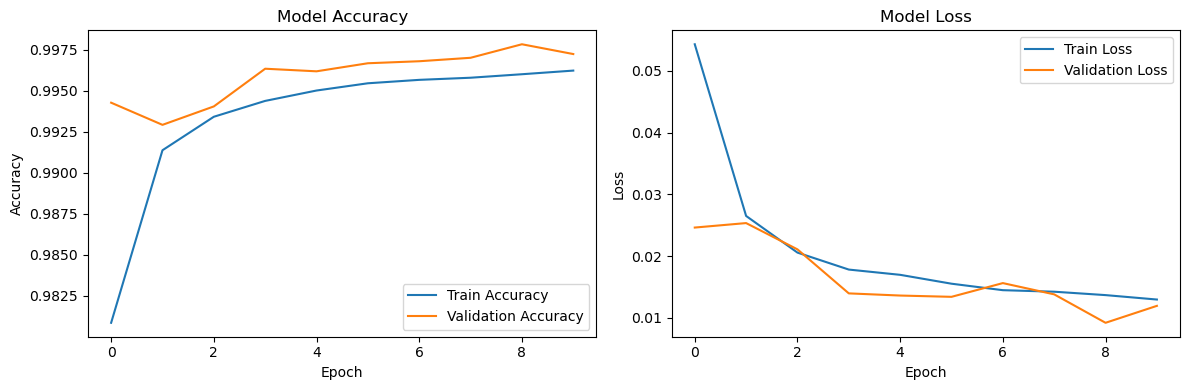


Fraud Data - Training vs Validation Accuracy and Loss:


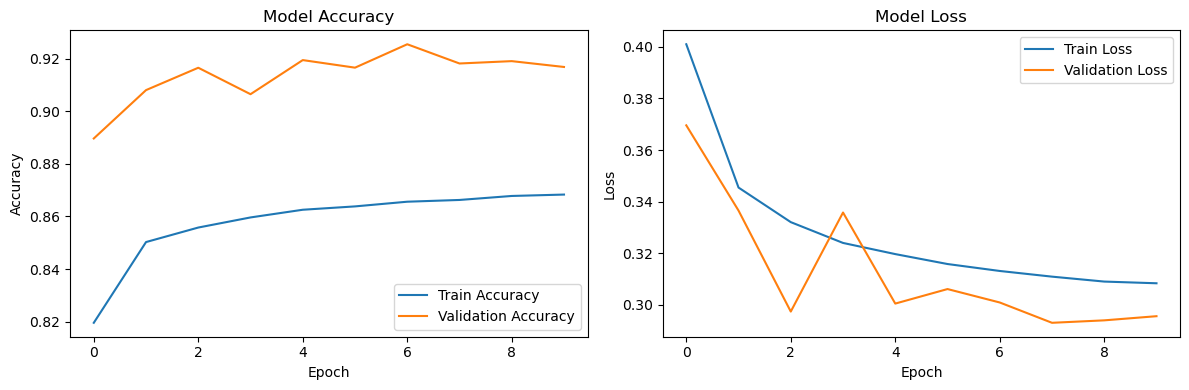


Credit Card Data - Model Evaluation:
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Accuracy: 0.9972
Precision: 0.3677
Recall: 0.8367
F1 Score: 0.5109


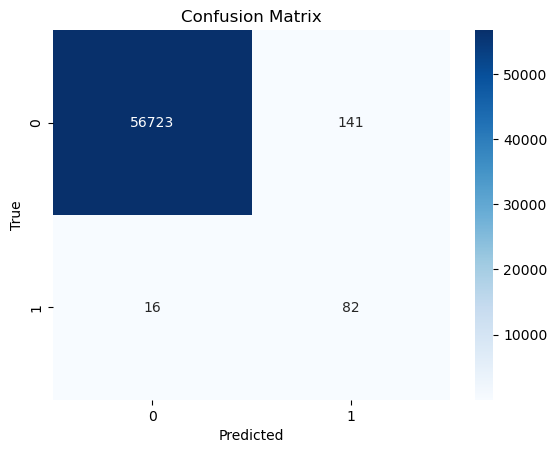


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.37      0.84      0.51        98

    accuracy                           1.00     56962
   macro avg       0.68      0.92      0.75     56962
weighted avg       1.00      1.00      1.00     56962


Fraud Data - Model Evaluation:
945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Accuracy: 0.9169
Precision: 0.5564
Recall: 0.5527
F1 Score: 0.5545


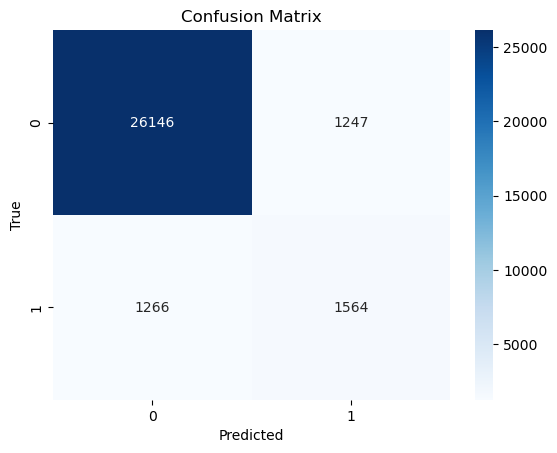


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     27393
           1       0.56      0.55      0.55      2830

    accuracy                           0.92     30223
   macro avg       0.76      0.75      0.75     30223
weighted avg       0.92      0.92      0.92     30223



In [9]:
# Plot training vs validation accuracy and loss for Credit Card Data
print("\nCredit Card Data - Training vs Validation Accuracy and Loss:")
plot_training_history(history_creditcard)

# Plot training vs validation accuracy and loss for Fraud Data
print("\nFraud Data - Training vs Validation Accuracy and Loss:")
plot_training_history(history_fraud)

# Evaluate the model for Credit Card Data
print("\nCredit Card Data - Model Evaluation:")
evaluate_model(cnn_creditcard, X_test_creditcard, y_test_creditcard, y_test_creditcard)

# Evaluate the model for Fraud Data
print("\nFraud Data - Model Evaluation:")
evaluate_model(cnn_fraud, X_test_fraud, y_test_fraud, y_test_fraud)


In [11]:
import os

# Create the directory to save the models if it doesn't exist
model_dir = '../notebooks/model/'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Save the CNN models after training
cnn_creditcard.save(os.path.join(model_dir, 'cnn_creditcard.h5'))
cnn_fraud.save(os.path.join(model_dir, 'cnn_fraud.h5'))

print("Models saved successfully!")


Models saved successfully!
